Adding libraries

In [507]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

Reading data from file

In [508]:
main_data = pd.read_csv('/content/SeoulBikeData.csv')
main_data.drop(['Date'], axis=1, inplace=True)
main_data.head(20)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


Label Encoding

In [509]:
from sklearn import preprocessing

print(main_data['Seasons'].value_counts())
print(main_data['Functioning Day'].value_counts())
print(main_data['Holiday'].value_counts())

label_encoder = preprocessing.LabelEncoder()

main_data['Seasons'] = label_encoder.fit_transform(main_data['Seasons'])
main_data['Functioning Day'] = label_encoder.fit_transform(main_data['Functioning Day'])
main_data['Holiday'] = label_encoder.fit_transform(main_data['Holiday'])

main_data

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
Yes    8465
No      295
Name: Functioning Day, dtype: int64
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


In [510]:
main_data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


Taking into account only numerical values

In [511]:
df = main_data.select_dtypes(include=['float64','int64'])
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


Info about new dataframe

In [512]:
print(df.columns)
df.describe()
df.shape

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


(8760, 13)

Exploring Outliers

In [513]:
#df['Wind speed (m/s)'].quantile(0.98) #Above 5.5 can be considered outlier
# df[df['Wind speed (m/s)']>5.5]

# df['Temperature(C)'].quantile(0.95) #Above 36.1 and Below -13.5 can be considered outlier
df[df['Temperature(C)']>37]
# df['Visibility (10m)'].quantile(0.98) #Below 100 can be considered outlier
# df[df['Visibility (10m)']>1900]
# df['Dew point temperature(C)'].quantile(0.2) #Above 25.3 and below -27.5
# df[df['Dew point temperature(C)']>25.5]
# df['Solar Radiation (MJ/m2)'].quantile(0.2) # above 3.3 can be considered outlier
# df['Solar Radiation (MJ/m2)'].value_counts()
# df['Rainfall(mm)'].quantile(0.98) #Above 9.5 can be considered outlier
# df[df['Rainfall(mm)']>6]
# df['Snowfall (cm)'].quantile(0.99) #Above 3.5 can be considered outlier
# df[df['Snowfall (cm)']>3.5]

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
5606,565,14,37.4,34,2.3,1860,18.8,3.05,0.0,0.0,2,1,1
5607,632,15,37.5,33,2.0,1816,18.4,2.32,0.0,0.0,2,1,1
5608,771,16,37.8,31,2.5,1929,17.7,2.46,0.0,0.0,2,1,1
5609,965,17,37.6,33,2.1,1837,18.5,1.82,0.0,0.0,2,1,1
5823,665,15,37.8,34,1.8,1965,19.2,2.81,0.0,0.0,2,1,1
5825,1184,17,38.0,36,1.3,1989,20.3,2.03,0.0,0.0,2,1,1
5845,533,13,37.9,38,2.3,1868,21.1,3.05,0.0,0.0,2,1,1
5846,475,14,38.7,38,2.4,1943,21.8,3.12,0.0,0.0,2,1,1
5847,531,15,39.3,37,2.3,1892,21.9,2.82,0.0,0.0,2,1,1
5848,561,16,39.4,39,2.5,1897,22.8,2.42,0.0,0.0,2,1,1


Removing outliers

In [514]:
df = df[df['Wind speed (m/s)']<5.5]

df = df[df['Temperature(C)']>-15]
df = df[df['Temperature(C)']<37]

df = df[df['Visibility (10m)']>100]

df = df[df['Dew point temperature(C)']<25.3]
df = df[df['Dew point temperature(C)']>-27.5]

df = df[df['Solar Radiation (MJ/m2)']<3.3]

df = df[df['Rainfall(mm)']<9.5]

df = df[df['Snowfall (cm)']<3.5]

#After removing outliers

df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


Checking for missing values

In [515]:
df.isna().sum()

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Plotting Correlation

In [516]:
df_corr = df.corr()
df_corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Rented Bike Count,1.000000,0.409802,0.538611,-0.192652,0.124830,0.191107,0.379410,0.254032,-0.153136,-0.131950,-0.246322,0.072576,0.208139
Hour,0.409802,1.000000,0.110457,-0.248866,0.289083,0.098981,-0.012423,0.141733,-0.010356,-0.002666,0.006541,-0.001541,0.004930
Temperature(C),0.538611,0.110457,1.000000,0.166087,-0.036019,0.035720,0.911705,0.345113,0.049285,-0.219615,-0.329974,0.058906,-0.050760
Humidity(%),-0.192652,-0.248866,0.166087,1.000000,-0.334482,-0.525596,0.544648,-0.459269,0.287549,0.064477,-0.123820,0.055312,-0.022419
Wind speed (m/s),0.124830,0.289083,-0.036019,-0.334482,1.000000,0.164587,-0.176218,0.337204,-0.036193,0.006737,0.113495,-0.026922,0.005567
Visibility (10m),0.191107,0.098981,0.035720,-0.525596,0.164587,1.000000,-0.171069,0.137904,-0.206120,-0.090109,-0.011700,-0.037817,-0.024936
Dew point temperature(C),0.379410,-0.012423,0.911705,0.544648,-0.176218,-0.171069,1.000000,0.085996,0.142403,-0.164278,-0.324238,0.070811,-0.053655
Solar Radiation (MJ/m2),0.254032,0.141733,0.345113,-0.459269,0.337204,0.137904,0.085996,1.000000,-0.088200,-0.063655,-0.073291,0.004352,-0.007556
Rainfall(mm),-0.153136,-0.010356,0.049285,0.287549,-0.036193,-0.206120,0.142403,-0.088200,1.000000,-0.020231,-0.036766,0.020335,0.005725
Snowfall (cm),-0.131950,-0.002666,-0.219615,0.064477,0.006737,-0.090109,-0.164278,-0.063655,-0.020231,1.000000,0.165563,0.000110,0.031655


Heatmap of correlation

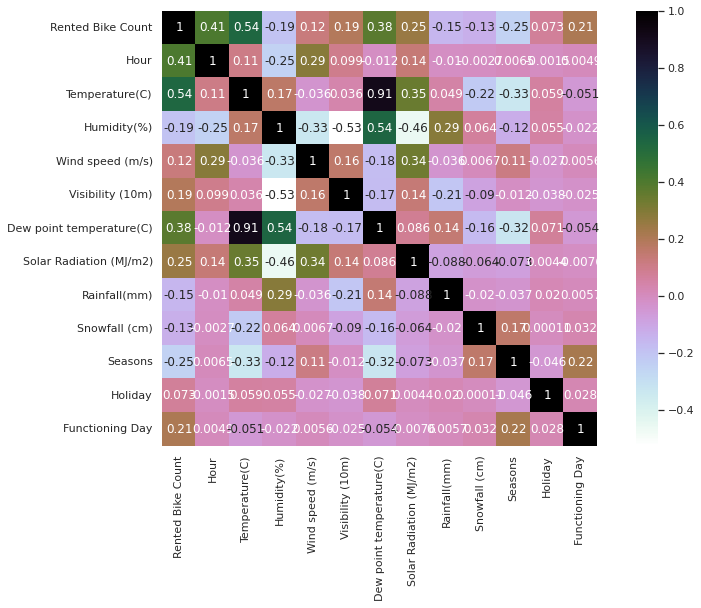

In [517]:
plt.figure(figsize= (14,8))
sns.heatmap(df_corr,annot = True, cmap = 'cubehelix_r',square = True)
plt.show()

Highly correlated features

In [518]:
data_corr = df_corr['Rented Bike Count'][:-1]
print(data_corr[abs(data_corr)>=0.30].sort_values(ascending = True))
print("These features are strongly correlated with the independant feature")

Dew point temperature(C)    0.379410
Hour                        0.409802
Temperature(C)              0.538611
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64
These features are strongly correlated with the independant feature


Seperating columns with independant and dependant features into different dataframes

In [519]:
x = df.drop(['Rented Bike Count'],axis=1)
y = df['Rented Bike Count']

Splitting for training and testing

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.15)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
ydf = pd.DataFrame(Y_test)

(7232, 12)
(7232,)
(1277, 12)
(1277,)


In [521]:
ydf

,Rented Bike Count
6081,672
5548,267
5263,410
3716,1389
4377,1219
...,...
1670,253
7605,1312
1980,351
5728,905


Linear Regression

In [522]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(X_train,Y_train)

LinearRegression()

Testing the data prediction

In [523]:
pred = ln_reg.predict(X_test)
pred

array([1058.06538801,  692.81534249,  786.34407332, ...,  451.68692284,
       1451.08815557, -211.58827207])

Checking Accuracy score

In [524]:
ln_reg_score=ln_reg.score(X_test,Y_test)
print("Our Accuracy Score: ",ln_reg_score)
print("As per the accuracy score, our model performance is acceptable")

Our Accuracy Score:  0.5502782824645629
As per the accuracy score, our model performance is acceptable


In [525]:
ydf['Predicted Value'] = pred

In [526]:
ydf

,Rented Bike Count,Predicted Value
6081,672,1058.065388
5548,267,692.815342
5263,410,786.344073
3716,1389,1260.756188
4377,1219,872.533736
...,...,...
1670,253,432.744425
7605,1312,1205.810035
1980,351,451.686923
5728,905,1451.088156


R2 score

In [527]:
from sklearn.metrics import r2_score

print('R Squared Score of linear regression:',r2_score(Y_test,pred))

R Squared Score of linear regression: 0.5502782824645629


Ridge Regression

In [528]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, Y_train)
ridge_score = ridge.score(X_test, Y_test)

print("Accuracy Using ridge: ",ridge_score)

Accuracy Using ridge:  0.5503435536959616


Lasso Regression

In [529]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, Y_train)
lasso_score = lasso.score(X_test, Y_test)

print("Accuracy Using lasso: ",lasso_score)

Accuracy Using lasso:  0.5512088646076114
